Importing necessary modules

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binomtest

Creating the databases for the different companies

In [72]:
appleDf = pd.read_csv('data_bases/apple.csv')
googleDf = pd.read_csv('data_bases/google.csv')
microsoftDf = pd.read_csv('data_bases/microsoft.csv')
twitterDf = pd.read_csv('data_bases/twitter.csv')

n_apple = len(appleDf)
n_google = len(googleDf)
n_microsoft = len(microsoftDf)
n_twitter = len(twitterDf)


Counting positive and negative tweets for each company

In [73]:
def countTweets(df):
    positive = (df['target'] == 4).sum()
    negative = (df['target'] == 0).sum()
    neutral = (df['target'] == 2).sum()
    return positive, neutral, negative

applePos, appleNeut, appleNeg = countTweets(appleDf)
googlePos, googleNeut, googleNeg= countTweets(googleDf)
microsoftPos, microsoftNeut, microsoftNeg = countTweets(microsoftDf)
twitterPos, twitterNeut, twitterNeg = countTweets(twitterDf)

Visualising the different tweet counts

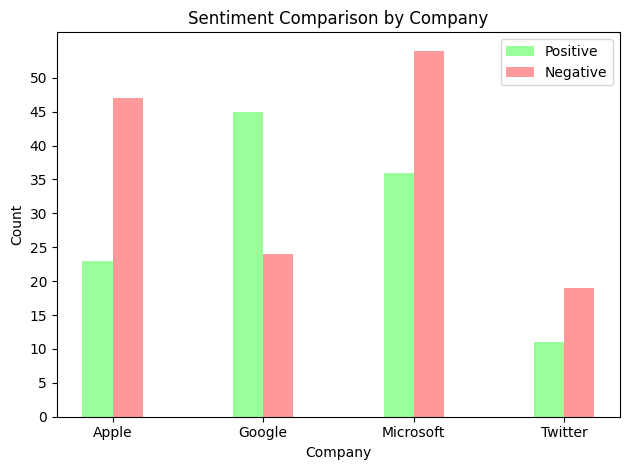

In [74]:
companies = ['Apple', 'Google', 'Microsoft', 'Twitter']
positive = [applePos, googlePos, microsoftPos, twitterPos]
neutral = [appleNeut, googleNeut, microsoftNeut, twitterNeut]
negative = [appleNeg, googleNeg, microsoftNeg, twitterNeg]

bar_width = 0.2
x = np.arange(len(companies))

if all(value != 0 for value in neutral):
    plt.figure(figsize=(10, 6))
    plt.bar(x-bar_width, positive, width=bar_width, label='Positive', color='#99ff99')
    plt.bar(x, neutral, width=bar_width, label='Neutral', color='#66b3ff')
    plt.bar(x + bar_width, negative, width=bar_width, label='Negative', color='#ff9999')
    plt.xlabel('Company')
    plt.ylabel('Count')
    plt.title('Sentiment Comparison by Company')
    plt.xticks(x, companies)
    y_ticks = np.arange(0, max(positive + neutral + negative) + 1, step=5) 
    plt.yticks(y_ticks)
else : 
    plt.bar(x, positive, width=bar_width, label='Positive', color='#99ff99')
    plt.bar(x + bar_width, negative, width=bar_width, label='Negative', color='#ff9999')
    plt.xlabel('Company')
    plt.ylabel('Count')
    plt.title('Sentiment Comparison by Company')
    plt.xticks(x + (bar_width)/2, companies)
    y_ticks = np.arange(0, max(positive +  negative) + 1, step=5) 
    plt.yticks(y_ticks)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data = [
    [applePos, appleNeg],
    [googlePos, googleNeg],
    [microsoftPos, microsoftNeg],
    [twitterPos, twitterNeg],
]
labels = ['Positive', 'Negative']
colors = ['#99ff99', '#ff9999']

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.pie(
        data[i],
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
    )
    ax.set_title(companies[i])

plt.suptitle('Sentiment Distribution by Company', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


Calculating the median for each company

In [75]:
appleMedianTarget = appleDf['target'].median()
googleMedianTarget = googleDf['target'].median()
microsoftMedianTarget = microsoftDf['target'].median()
twitterMedianTarget = twitterDf['target'].median()

print(f"Median target for Apple: {appleMedianTarget}")
print(f"Median target for Google: {googleMedianTarget}")
print(f"Median target for Microsoft: {microsoftMedianTarget}")
print(f"Median target for Twitter: {twitterMedianTarget}")

Median target for Apple: 0.0
Median target for Google: 4.0
Median target for Microsoft: 0.0
Median target for Twitter: 0.0


For all companies the majority of the tweets were neutral, however public opinion might still lean one way or another regarding them. In order to test whether it leans positive or negative, only those tweets which show a positive or negative appreciation of the company will be tested in the next test. In other words, only tweets wich expres a clear feeling towards a certain company will be taken into account. This comes with both strengths and weaknesses: 
- There may be small, overrepresented and vocal groups who either like or dislike a company for specific reasons which do not apply to the general polulation
- It follows that it is harder to infer a general ambivalence concerning the corporation if those groupd happen to lean positive or negative

Still, this way of analising the data can filter out the hundreds of normal, uninteresting interactions between users and brands which are bound to happen in the case of technology conglomerates.

A binomial test will be used to determine whether the distribution of positive and negative tweets corresponds to an equal distribution. As such the null hypothesys is as follows:
- H $_{0}$: the frequency distribution of the sample corresponds to an equal distribution, where positive and negative reviews are equally likely to occur.
- H $_{1}$: a company is more likely to receive negative reviews than positive ones (or vice versa in the case of google).


In [9]:
applePval = binomtest(appleNeg, n=(applePos + appleNeg), p=0.5, alternative='greater')
googlePval = binomtest(googleNeg, n=(googlePos + googleNeg), p=0.5, alternative='less')
microsoftPval = binomtest(microsoftNeg, n=(microsoftNeg + microsoftPos), p=0.5, alternative='greater')
twitterPval = binomtest(twitterNeg, n=(twitterPos + twitterNeg), p=0.5, alternative='greater')

print(f"Apple p value: {applePval.pvalue}")
print(f"Google p value: {googlePval.pvalue}")
print(f"Microsoft p value: {microsoftPval.pvalue}")
print(f"Twitter p value: {twitterPval.pvalue}")

Apple p value: 0.0027913336755116865
Google p value: 0.007716148726850634
Microsoft p value: 0.036274766096230884
Twitter p value: 0.10024421103298667


The only company for which the null hipothesys stands is Twitter, as it has a p value greater than 0.05, which means that  given that a person that has a non-neutral opinion about one of these corporations, that opinion will, more likely than not, be negative in the case of microsoft and apple and positive in the case of google.